# Introduction to Kriging
 
 Understanding the general concept via a simple 1-D exampe
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate

Generate the data

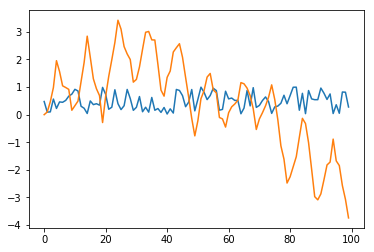

In [44]:
# non-correlated vector
vector1 = np.random.rand(100)
x = np.arange(0,100)

# correlated vector
vector2 = np.zeros(100)
for i in range(1,100):
    if (i%10 < 5):
        vector2[i] = vector2[i-1] + np.random.rand()
    else:
        vector2[i] = vector2[i-1] - np.random.rand()
        
plt.plot(vector1)
plt.plot(vector2)

what interpolation is used in the plot?

## k-lag autocorrelation

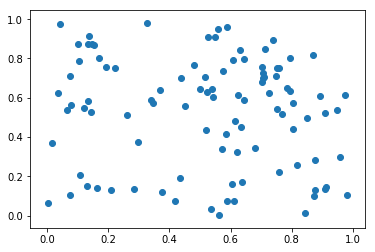

In [9]:
k = 1
Z0 = vector1[:len(vector1)-k]
Zk = vector1[k:]

plt.scatter(Z0,Zk)

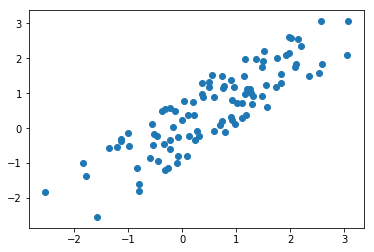

In [12]:
k = 1
Z0 = vector2[:len(vector1)-k]
Zk = vector2[k:]

plt.scatter(Z0,Zk)

Calculate k-lag autocorrelation

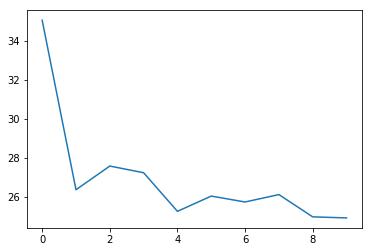

In [14]:
lags = 10
ac = np.zeros(lags)
for k in range(0,10):
    a = vector1[:len(vector1)-k]
    v = vector1[k:]
    ac[k] = np.correlate(a,v)
    
plt.plot(ac)

Why do we have bigger values than 1?

## Calculate semi variogram

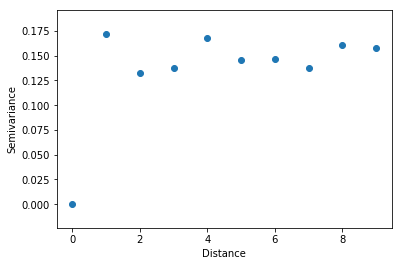

In [39]:
vector = vector1

lags = 10
t = np.arange(0,lags)
gamma = np.zeros(lags)

for h in range(0,lags):
    gamma[h] = (1/len(vector[h:]))*np.sum((vector[:len(vector)-h]-vector[h:])**2)
    
plt.scatter(t,gamma)
plt.xlabel('Distance')
plt.ylabel('Semivariance')

gamma1 = gamma

Text(0, 0.5, 'Semivariance')

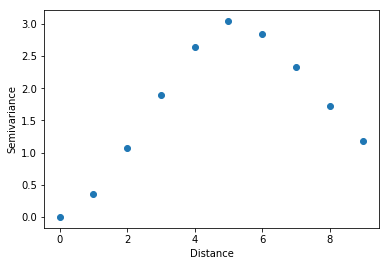

In [31]:
vector = vector2

lags = 10
gamma = np.zeros(lags)

for h in range(0,lags):
    gamma[h] = (1/len(vector[h:]))*np.sum((vector[:len(vector)-h]-vector[h:])**2)
    
plt.scatter(t,gamma)
plt.xlabel('Distance')
plt.ylabel('Semivariance')

gamma2 = gamma

## Fitting a variance model

Exponential model:

$\gamma(h) = c_0 + c(1-exp(-h/r))$

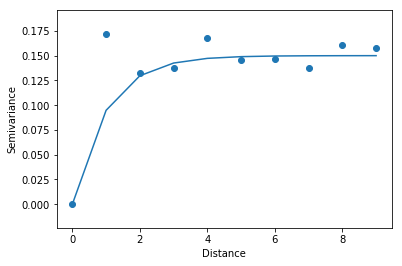

In [41]:
c0 = 0
c = 0.15
r  = 1

gamma_fit = c0 + c*(1-np.exp(-t/r))

plt.scatter(t,gamma1)
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.plot(gamma_fit)

calculating the mean with weighted average

$Y(x_i) = \sum(\lambda(x_i) Y)$

$\lambda(x_i) = f(\gamma,|x_i-x_o|)$

In [99]:
ti = np.arange(0,len(vector),0.01)
gamma_fiti = c0 + c*(1-np.exp(-ti/r))

In [100]:
Vi = np.zeros(len(ti))

for i in range(0,len(ti)):
    lam = np.zeros(len(x))
    for j in range(0,len(x)):
        if (abs(x[j]-ti[i])>=lags):
            lam[j] = 0
        else:
            lam[j] = 1-gamma_fit[int(abs(x[j]-ti[i]))]
    lam /= np.sum(lam)
    Vi[i] = np.sum(lam*vector1)

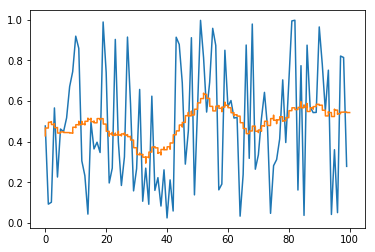

In [101]:
plt.plot(vector1)
plt.plot(ti,Vi)

Why not exact?

array([0.        , 0.09481808, 0.12969971, 0.14253194, 0.14725265,
       0.14898931, 0.14962819, 0.14986322, 0.14994968, 0.14998149])